# REGRESSÃO LINEAR SIMPLES

#### Definindo o Problema de Negócio
Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston. Para cada casa temos diversas variáveis explanatórias. Sendo assim, podemos resolver este problema empregando Regressão Linear Simples ou Múltipla.

#### Definindo o Dataset
Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

- CRIM: per capita crime rate by town / 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- TARGET: Median value of owner-occupied homes in $1000's

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
dataset = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap05_Regressao_pt2/dados/PY/BostonHousing.csv")

In [4]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
dataset = dataset.rename(columns = {'medv': "Target"})

In [6]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Calculando a média da variavel de resposta
valor_medio_esperado_na_previsao = dataset['Target'].mean()

In [8]:
valor_medio_esperado_na_previsao

22.532806324110677

In [9]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['Target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


<Axes: ylabel='Frequency'>

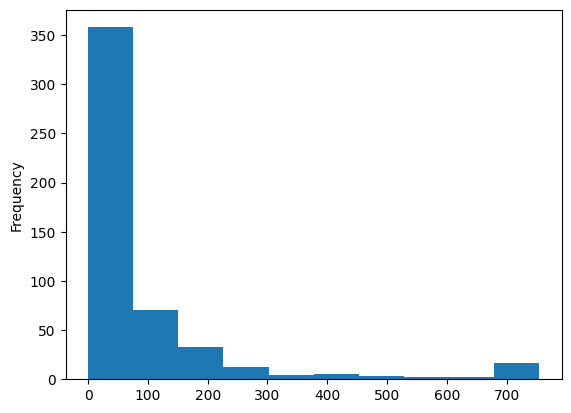

In [10]:
squared_errors.plot(kind = 'hist')

In [11]:
# Para Regressão Simples, usaremos a variável RM que representa o nmr médio de quartos nas casas

In [12]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
 observations = float(len(variable))
 return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias,1)))

In [14]:
# Imprime o desvio padrao via formula e via Numpy da variável RM (qtde de quartos)
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['rm']), np.std(dataset['rm'])))

Resultado da Função: 0.70139 Resultado do Numpy: 0.70488


In [15]:
# Função para calcular a variância da variável RM e a correlação com a variável target (MANUAL)
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [47]:
# COMPARANDO O RESULTADO DAS FUNÇÕES COM A FUNÇÃO PEARSONR DO SCIPY
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['rm'], dataset['Target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['rm'], dataset['Target'])[0])

Nossa estimativa de Correlação: 0.69617
Correlação a partir da função pearsonr do SciPy: 0.69617


In [19]:
# colocando em gráfico 
x_range = [dataset['rm'].min(), dataset['rm'].max()]
y_range = [dataset['Target'].min(), dataset['Target'].max()]

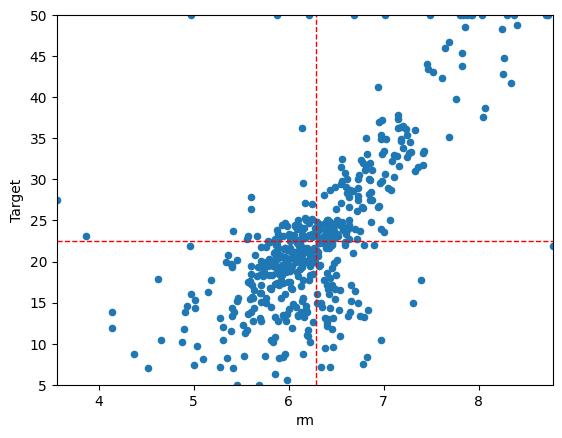

In [20]:
# PLOT
scatter_plot = dataset.plot(kind = 'scatter', x='rm', y='Target', xlim=x_range, ylim=y_range)

# Calculo da média 
meanY = scatter_plot.plot(x_range, [dataset['Target'].mean(),dataset['Target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['rm'].mean(), dataset['rm'].mean()], y_range, '--', color = 'red', linewidth = 1)

# REGRESSÃO LINEAR COM StasModels

In [21]:
# Importando funções 
import statsmodels.api as sm

In [40]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix
y = dataset['Target']
x = dataset['rm']

In [41]:
# Esse comando adiciona os valores dos coeficientes a variavel X( o bias será calculado internamente pela funcao)
x = sm.add_constant(x)

# StatsModels requer uma matriz de entrada

In [42]:
x.head()

,const,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [43]:
dataset[dataset['rm'].isna()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Target


In [44]:
dataset[dataset['Target'].isna()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Target


In [45]:
dataset = dataset.dropna(subset=['rm'])

In [46]:
# Criando o modelo de Regressão Simples
modelo = sm.OLS(y,x)
modelo_v1 = modelo.fit()

In [48]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     469.3
Date:                Mon, 27 May 2024   Prob (F-statistic):           7.56e-74
Time:                        16:45:19   Log-Likelihood:                -1657.9
No. Observations:                 501   AIC:                             3320.
Df Residuals:                     499   BIC:                             3328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6841      2.659    -13.043      0.0

In [49]:
print(modelo_v1.params)

const   -34.684058
rm        9.109202
dtype: float64


In [50]:
# Gerando os valores previstos 
valores_previstos = modelo_v1.predict(x)
valores_previstos

0      25.208946
1      23.806129
2      30.765559
3      29.062139
4      30.419410
         ...    
501    25.372912
502    21.064259
503    28.861736
504    27.203861
505    20.244431
Length: 501, dtype: float64

In [54]:
# Fazendo previsões com o modelo treinado 
RM = 5
Xp = np.array([1, RM])
print(f"Se RM = {RM}, nosso modelo prevê que a mediana da tx de copuação será {modelo_v1.predict(Xp)}")

Se RM = 5, nosso modelo prevê que a mediana da tx de copuação será [10.8619528]


### Criando Scatter Plot para o modelo com a LINHA DE REGRESSÃO

In [55]:
# Range de valores para x e y
x_range = [dataset['rm'].min(), dataset['rm'].max()]
y_range = [dataset['Target'].min(), dataset['Target'].max()]

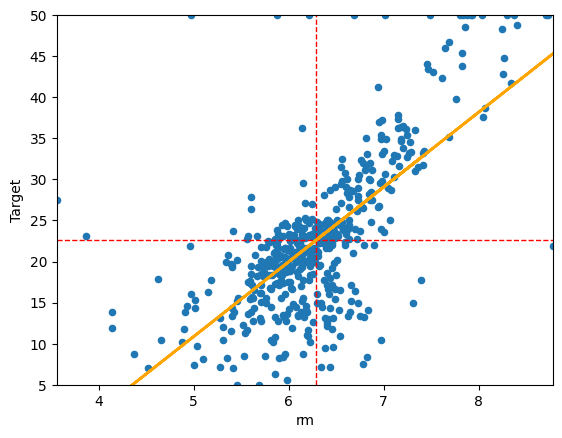

In [56]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'rm', y = 'Target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['Target'].mean(),dataset['Target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['rm'].mean(),dataset['rm'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['rm'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [57]:
# Gerando os Resíduos
residuos = dataset['Target'] - valores_previstos
residuos_normalizados = standardize(residuos)

In [62]:
residuos.head()

0   -1.208946
1   -2.206129
2    3.934441
3    4.337861
4    5.780590
dtype: float64

In [63]:
residuos_normalizados.head()

0   -0.182589
1   -0.333194
2    0.594224
3    0.655153
4    0.873050
dtype: float64

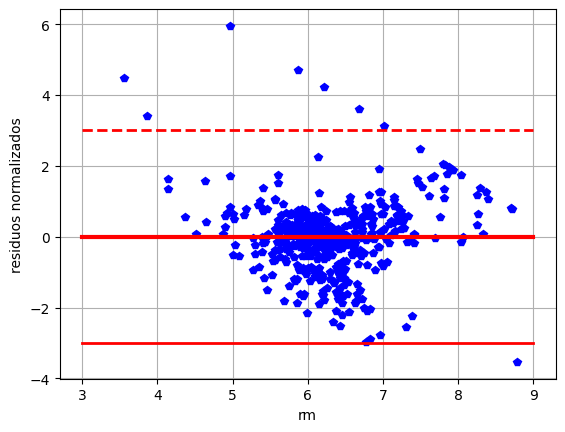

In [64]:
# ScaterPlot dos Resíduos 
residual_scatter_plot = plt.plot(dataset['rm'], residuos_normalizados, 'bp')
plt.xlabel('rm')
plt.ylabel('residuos normalizados')
mean_residual = plt.plot([int(x_range[0]), round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1],0)], [-3,-3], '-', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

In [67]:
from sklearn import linear_model

In [77]:
# Criando o Modelo
modelo_v2 = linear_model.LinearRegression(fit_intercept = True)

In [78]:
modelo_v2

LinearRegression()

In [79]:
# Define os valores de X e Y

num_observ = len(dataset)
X = dataset['rm'].values.reshape((num_observ,1)) # X deve sempre ser uma matriz e nunca um vetor
Y = dataset['Target'].values # Y pode ser um vetor 

In [80]:
type(X)

numpy.ndarray

In [81]:
#Numero de dimensões de X (matriz)
np.ndim(x)

2

In [82]:
type(Y)

numpy.ndarray

In [83]:
# Treinando o modelo com os dados já preparados
modelo_v2.fit(X,Y)

LinearRegression()

In [84]:
# Imprime os coeficientes 
print(modelo_v2.coef_)
print(modelo_v2.intercept_)

[9.10920212]
-34.684057776793246


In [85]:
# Imprime as previsões do modelo
print(modelo_v2.predict(X))

[25.20894613 23.80612901 30.76555942 29.06213863 30.41940974 23.88811183
 20.08046534 21.53793768 16.60985933 20.00759172 20.05313773 18.96003348
 19.50658561 20.84563832 18.45902736 19.37905678 19.88006289 15.01574896
 17.48434274 16.05419801 19.65233284 21.26466162 18.26773412 19.27885555
 16.31836487 18.26773412 20.39928741 24.48020996 26.11075714 17.35681391
 20.62701747 19.51569481 17.24750348 20.84563832 18.52279178 18.6047746
 19.66144204 25.39113017 29.29897788 26.98524054 21.51061007 21.89319656
 20.59968986 17.07442864 18.02178566 20.24443098 14.49652444 16.34569247
 19.63411444 21.01871316 24.6259572  19.95293651 18.95092428 31.34854836
 23.45997933 27.40426384 21.29198922 19.30618316 17.61187157 19.66144204
 24.12495108 30.02771405 22.61282353 18.03089486 18.85983226 16.27281886
 18.92359667 23.7696922  19.61589603 20.56325305 22.20290943 22.45796709
 22.57638672 22.51262231 21.24644321 22.08448981 18.82339545 26.59354485
 25.60975102 22.72213395 21.49239167 23.51463454 25.

In [101]:
# Fazendo previsões com o modelo treinado 
RM = 5
Xp = np.array(RM)
Xp = np.array(RM).reshape(-1,1)

In [102]:
type(Xp)

numpy.ndarray

In [103]:
np.ndim(Xp)

2

In [104]:
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.9


### Comparação SckitLearn com StatsModels

In [105]:
## Comparação

from sklearn.datasets import make_regression

In [106]:
HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)

In [108]:
%%time
sk_linear_regression = linear_model.LinearRegression(fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

Wall time: 976 ms


LinearRegression()

In [109]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

Wall time: 2.52 s
